Thực hiện phân tích mô tả cho dữ liệu chuyến bay "nycflights.csv":
1. Cho cột dep_delay (khởi hành trễ)
2. Cho cột arr_delay (đến nơi trễ)
3. Cho cột distance (khoảng cách chuyến bay)
4. Sử dụng linear regression xây dựng mô hình dự đoán thời gian đến nơi trễ
(arr_delay) dựa vào thời gian xuất phát trễ (dep_delay) và khoảng cách
(distance).

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [2]:
df = pd.read_csv("data/nycflights.csv", low_memory=False)

In [3]:
df.isna().sum()

Unnamed: 0       0
year             0
month            0
day              0
dep_time      8255
dep_delay     8255
arr_time      8713
arr_delay     9430
carrier          0
tailnum       2512
flight           0
origin           0
dest             0
air_time      9430
distance         0
hour          8255
minute        8255
dtype: int64

In [4]:
df['dep_delay'].fillna(df['dep_delay'].mode()[0], inplace=True)
df['arr_delay'].fillna(df['arr_delay'].mode()[0], inplace=True)

In [23]:
X_train = df[['dep_delay','distance']].values 
y_train = df['arr_delay'].values

X_test = df[['dep_delay','distance']].values
y_test = df['arr_delay'].values

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
model.predict(X_test)

array([ -4.83125111,  -2.85699765,  -4.06087724, ..., -10.30442813,
        -9.44983331,  -9.47955835])

In [25]:
model.coef_

array([ 1.00694343, -0.00247709])

In [26]:
model.intercept_

-3.377216970191922

In [27]:
model.score(X_train, y_train)

0.8281015470738036

In [28]:
y_hat = model.predict(X_test)
y_hat

array([ -4.83125111,  -2.85699765,  -4.06087724, ..., -10.30442813,
        -9.44983331,  -9.47955835])

In [35]:
err = y_hat - y_test
err

array([-15.83125111, -22.85699765, -37.06087724, ...,   2.69557187,
         3.55016669,   3.52044165])

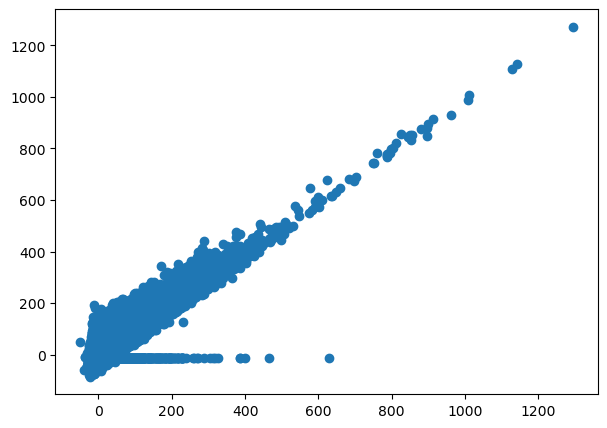

In [34]:
plt.figure(figsize=[7,5]) 
plt.scatter(y_hat, y_test)
plt.show()

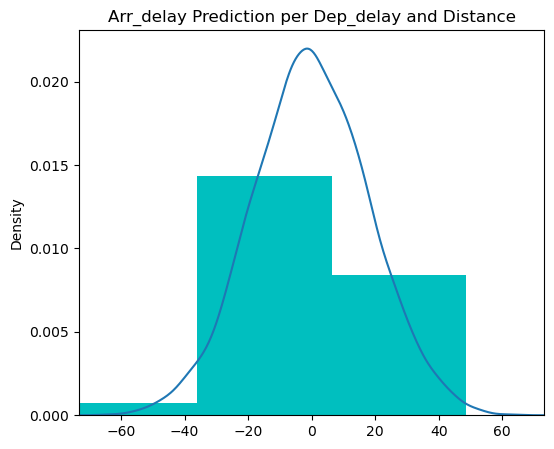

In [40]:
def plot_error(err, bins=10):
    mean, std = np.mean(err), np.std(err)
    
    plt.figure(figsize=[6,5])    
    plt.title("Arr_delay Prediction per Dep_delay and Distance")
    plt.xlim([mean - 4*std,mean + 4*std]); #plt.ylim([0,60])
    plt.hist(err, density=True, bins=bins, color='c')
    
    #x = np.linspace(mean - 4*std, mean + 4*std,100)
    #plt.plot(x, stats.norm.pdf(x, mean, std))
    
    norm_dist = np.random.normal(mean, std, 10000)
    #plt.hist(norm_dist, color='g', alpha=0.4, density=True, bins=50)
    pd.Series(norm_dist).plot.kde()
    
    
    plt.show()
plot_error(err, bins=20)

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.8281015470738036

In [42]:
# CI 95%
np.percentile(err, [2.5, 97.5])

array([-41.45005722,  29.55435561])